In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TASK-1

In [249]:
task1=pd.read_csv("email_spam.csv")

In [250]:
task1.head()

,word_free,word_offer,word_click,num_links,num_caps,sender_reputation,is_spam
0,6,5,4,2,46,0.122031,0
1,3,0,0,15,21,5.984427,0
2,7,8,6,10,33,5.655083,0
3,4,5,4,11,46,7.161791,1
4,6,2,5,9,7,5.990294,0


In [251]:
task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   word_free          200 non-null    int64  
 1   word_offer         200 non-null    int64  
 2   word_click         200 non-null    int64  
 3   num_links          200 non-null    int64  
 4   num_caps           200 non-null    int64  
 5   sender_reputation  200 non-null    float64
 6   is_spam            200 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.1 KB


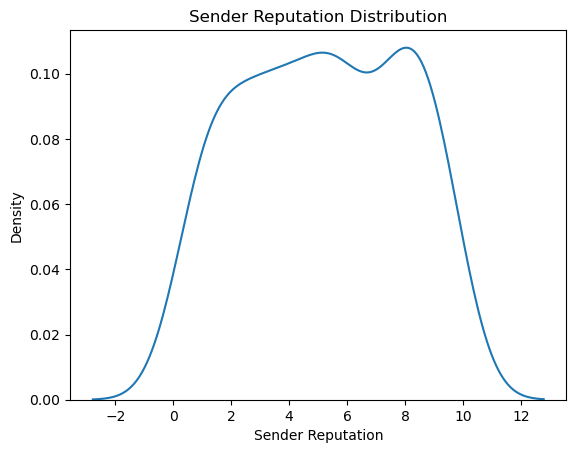

In [252]:
sns.kdeplot(x='sender_reputation',data=task1)
plt.xlabel('Sender Reputation')
plt.title('Sender Reputation Distribution') 
plt.ylabel('Density')
plt.show()

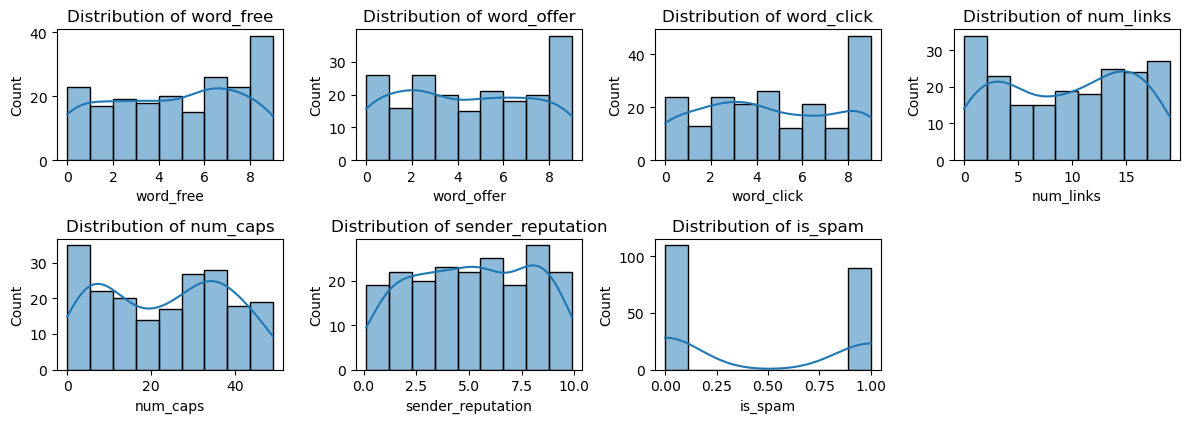

In [253]:
plt.figure(figsize=(12, 6))
plotnum=1
for cols in task1.columns:
    plt.subplot(3, 4, plotnum)
    sns.histplot(task1[cols], kde=True)
    plt.title(f'Distribution of {cols}')
    plotnum+=1
plt.tight_layout()
plt.show()

In [254]:
task1.skew()

word_free           -0.093313
word_offer           0.068754
word_click           0.068691
num_links           -0.089273
num_caps            -0.003076
sender_reputation   -0.052568
is_spam              0.202530
dtype: float64

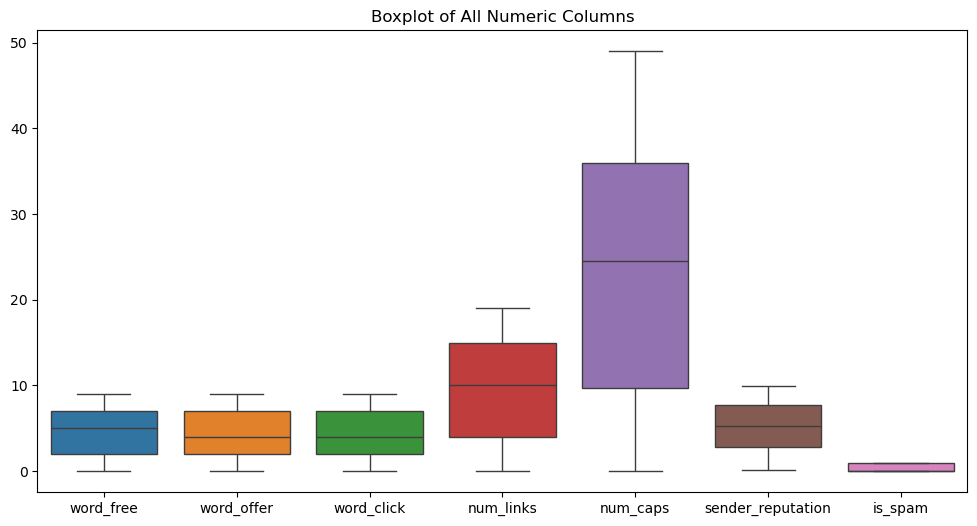

In [255]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=task1.select_dtypes(include='number'))
plt.title("Boxplot of All Numeric Columns")
plt.show()


In [256]:
X= task1.drop('is_spam', axis=1)
y= task1['is_spam']

In [257]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

Original dataset shape: is_spam
0    110
1     90
Name: count, dtype: int64
Resampled dataset shape: is_spam
0    110
1    110
Name: count, dtype: int64


In [258]:
#sCALING z SCORE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [259]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [261]:
model= LogisticRegression(
    penalty='l2',
    C=0.01,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'  # optional if classes are imbalanced
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [262]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Train data:")
print(f"Accuracy: {accuracy_score(y_train, model.predict(X_train)):.2f}")
print("Test data:")
print(f"Accuracy: {accuracy:.2f}")

Train data:
Accuracy: 0.59
Test data:
Accuracy: 0.41


In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000),
                    param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best C:", grid.best_params_)
print("accuracy")
print(f"Accuracy: {grid.best_score_:.2f}")

Best C: {'C': 0.01}
accuracy
Accuracy: 0.51


# Task-2

In [264]:
task2=pd.read_csv("customer_churn.csv")

In [265]:
task2.head()

,tenure_months,monthly_charges,support_tickets,is_premium,avg_usage_hours,churn
0,59,38.545887,1,0,8.884947,1
1,37,66.209729,1,1,3.499774,0
2,61,20.123184,0,0,8.663038,1
3,43,79.832727,9,0,1.002993,1
4,70,80.730645,7,1,1.159190,0


<Axes: xlabel='avg_usage_hours', ylabel='Density'>

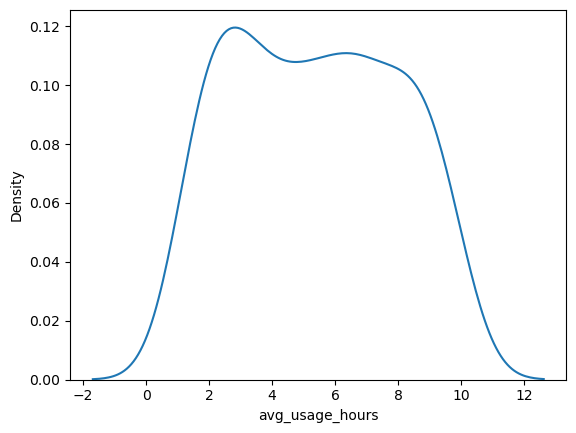

In [266]:
sns.kdeplot(x='avg_usage_hours',data=task2)

In [267]:
scaler = StandardScaler()
task2['avg_usage_hours'] = scaler.fit_transform(task2[['avg_usage_hours']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = task2.drop('churn', axis=1)
y = task2['churn']
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   